In [148]:
import os
# from os.path import exists
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
import seaborn as sns

import numpy as np

In [ ]:
print('Seaborn version > 0.13 is required. Your version is:')
print(sns.__version__)

## Variables

In [149]:
#Declare our variables
main_dir = '../Results/Data_Analysis'
sub_dir = '/data' #if we have another structure

dir = main_dir+sub_dir
plots_outdir = f'{main_dir}/generatedPlots/ratings'

if not os.path.exists(f'{plots_outdir}-PREVis'):
    os.makedirs(f'{plots_outdir}-PREVis')

if not os.path.exists(f'{plots_outdir}-factors'):
    os.makedirs(f'{plots_outdir}-factors')

#list of conditions (used in questions' codes)
conditions = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F'
]

full_factors = {
    "Understand" : ['obvious', 'meanOveral', 'confid', 'represent', 'understandEasi', 'understandQuick', 'meanElem'],
    "Layout" : ['crowd', 'messi', 'distract', 'organiz'],
    "DataFeat" : ['visibl', 'see'],
    "DataRead" : ['find', 'identifi', 'valu', 'inform', 'readabl']
}

final_scale = {
    "Understand" : ['obvious', 'represent', 'understandEasi'],
    "Layout" : ['messi', 'crowd', 'distract'],
    "DataFeat" : ['visibl', 'see'],
    "DataRead" : ['inform','identifi','find']
}

#items names

items = [
'answer',
'clearData',
'clearRepresent',
'complex',
'confid',
'confus',
'crowd',
'deciph',
'distinguish',
'distract',
'effect',
'find',
'identifi',
'inform',
'lost',
'meanElem',
'meanOveral',
'messi',
'obvious',
'organiz',
'read',
'readabl',
'represent',
'see',
'simpl',
'understandEasi',
'understandQuick',
'valu',
'visibl',
]

# custom colors

# color + grey
# colors = {
#     "Understand" : ['#499894','#7f7f7f'],
#     "Layout" : ['#59a14f', '#7f7f7f'],
#     "DataRead" : ['#967662', '#7f7f7f'],
#     "DataFeat" : ['#d37295', '#7f7f7f']
# }

#color + desaturated color
colors = {
    # "Understand" : ['#499894','#7e9694'],
    "Understand" : ['#4ba1bc','#829599'],
    "Layout" : ['#839e49', '#969b86'],
    "DataRead" : ['#a87c9f', '#a396a0'],
    # "DataFeat" : ['#e27487', '#c6b6ba'],
    "DataFeat" : ['#e08095', '#c6b6ba']
}


# Load answers

In [150]:
df = pd.read_csv(f'{dir}/ratings-stimulus.csv')
df

,seed,stimulus,answer,clearData,clearRepresent,complex,confid,confus,crowd,deciph,...,organiz,read,readabl,represent,see,simpl,understandEasi,understandQuick,valu,visibl
0,137777602085,A,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
1,193567932475,A,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,118973339337,A,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,86267314457,A,3.0,3.0,3.0,3.0,3.0,-3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,93477562472,A,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,22931754390,F,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-3.0,-2.0,...,-2.0,-1.0,1.0,1.0,-2.0,-2.0,-1.0,-2.0,2.0,2.0
1754,205924409863,F,1.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,-3.0,-2.0,-1.0,3.0,-2.0,-2.0,1.0,-1.0,-1.0,1.0
1755,173768347059,F,1.0,-1.0,-1.0,0.0,0.0,0.0,-2.0,-1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0
1756,17139137183,F,-1.0,-2.0,-3.0,-3.0,-1.0,-2.0,-3.0,-1.0,...,-2.0,-3.0,-2.0,3.0,0.0,-2.0,-2.0,-3.0,1.0,-2.0


# Plots individual items 

## For each stimulus, plot individual items against full factor

/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


CI width= 0.1463665674603165
Line2D(_child0)
Found CI bar


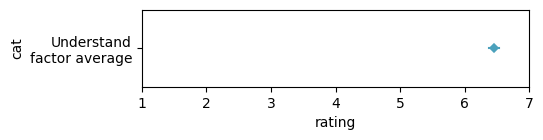

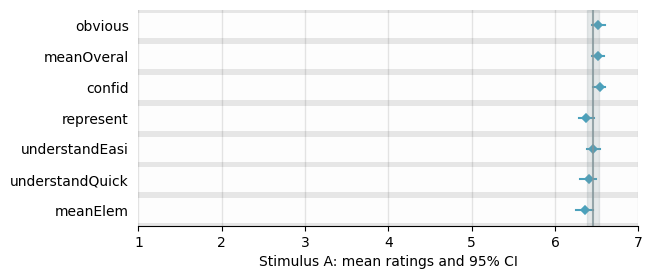

CI width= 0.238483796296296
Line2D(_child0)
Found CI bar


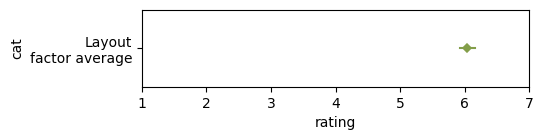

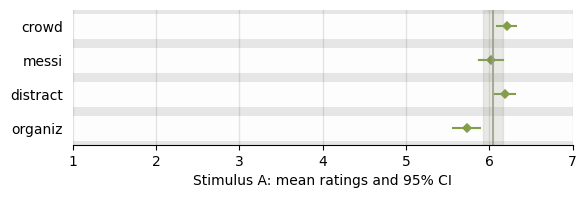

CI width= 0.27980769230769287
Line2D(_child0)
Found CI bar


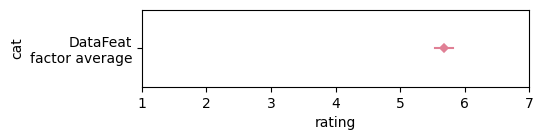

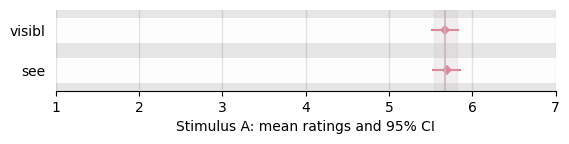

CI width= 0.17942129629629555
Line2D(_child0)
Found CI bar


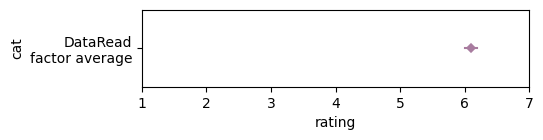

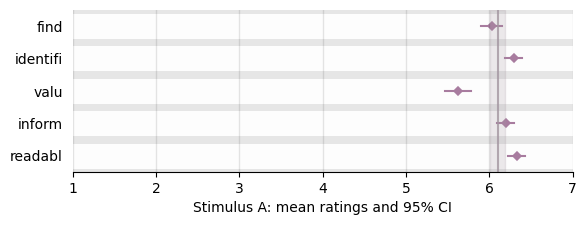

CI width= 0.13251488095238084
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


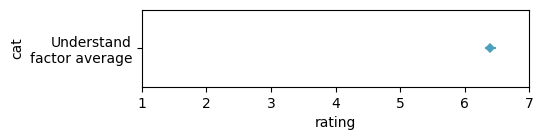

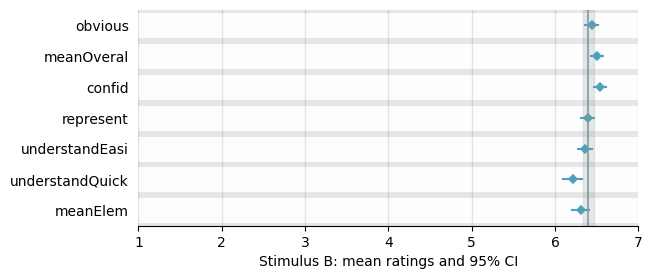

CI width= 0.30269820601851816
Line2D(_child0)
Found CI bar


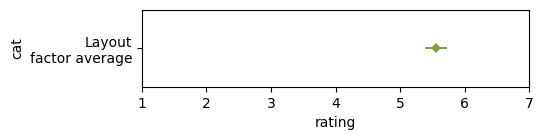

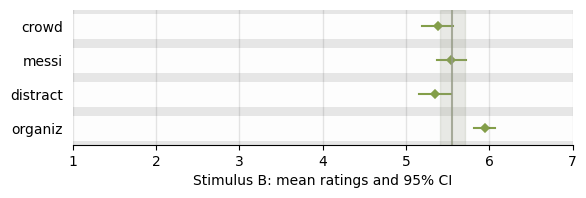

CI width= 0.23175087108013948
Line2D(_child0)
Found CI bar


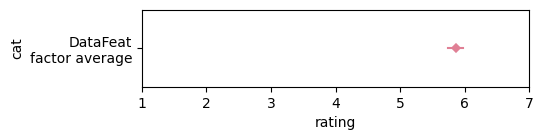

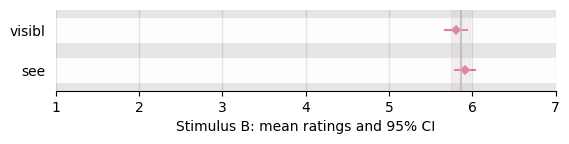

CI width= 0.16724392361111207
Line2D(_child0)
Found CI bar


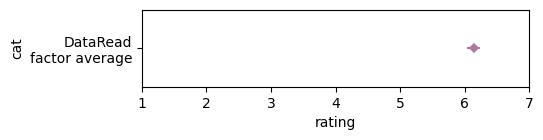

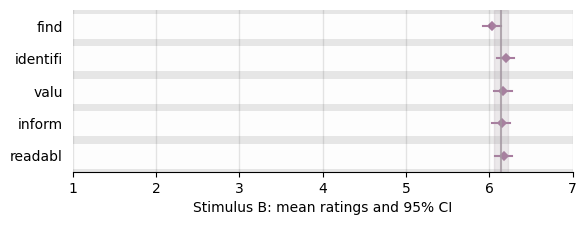

CI width= 0.14570681931308993
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


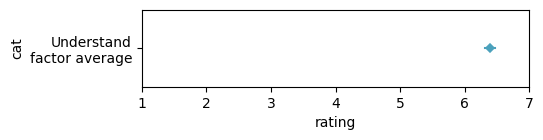

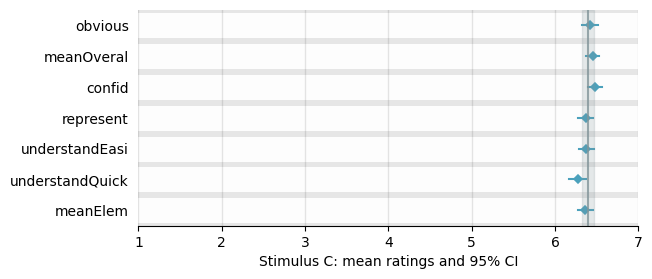

CI width= 0.24684233449477322
Line2D(_child0)
Found CI bar


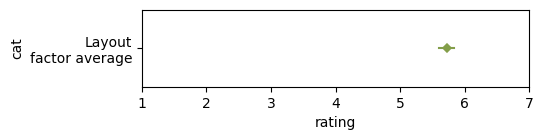

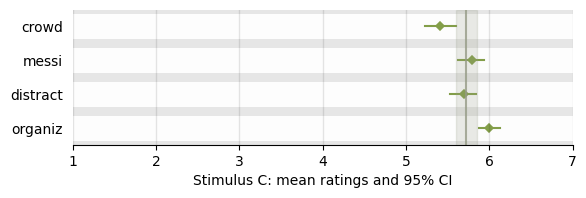

CI width= 0.29272648083623753
Line2D(_child0)
Found CI bar


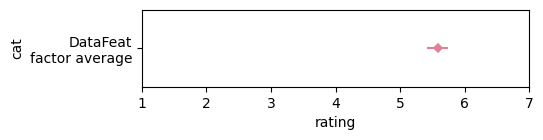

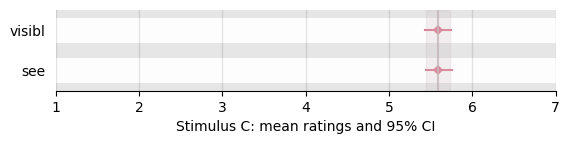

CI width= 0.17475174216027867
Line2D(_child0)
Found CI bar


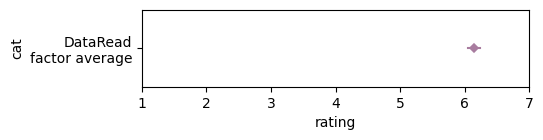

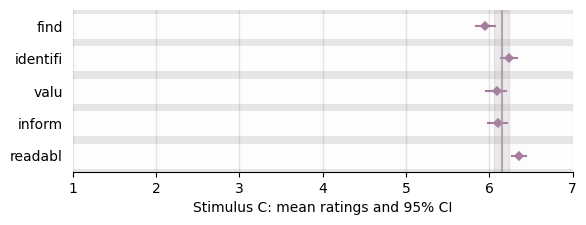

/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


CI width= 0.310630297426413
Line2D(_child0)
Found CI bar


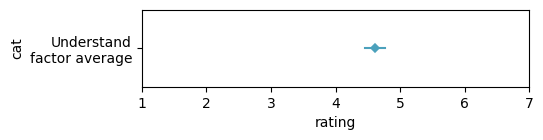

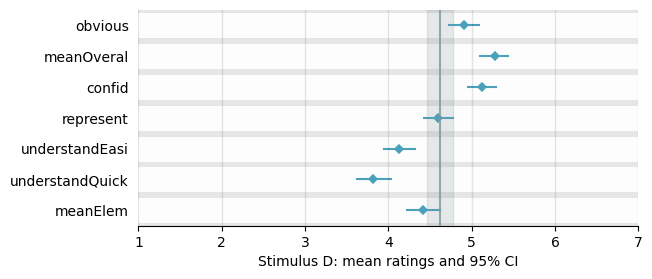

CI width= 0.29968985976267515
Line2D(_child0)
Found CI bar


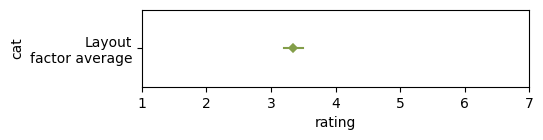

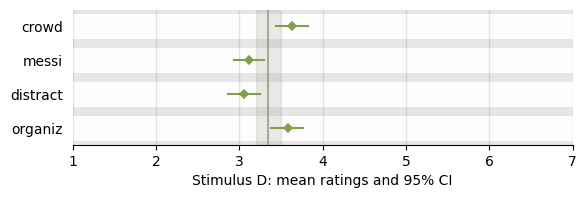

CI width= 0.37662337662337686
Line2D(_child0)
Found CI bar


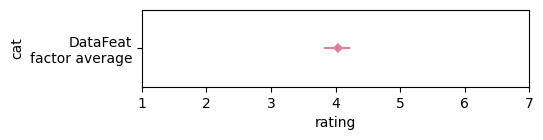

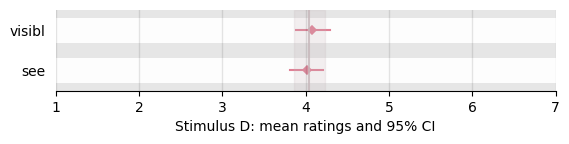

CI width= 0.2998705501618115
Line2D(_child0)
Found CI bar


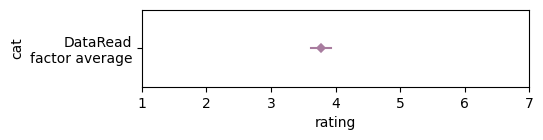

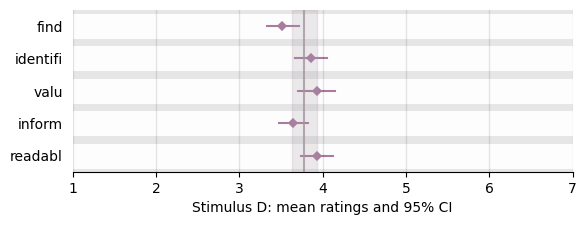

CI width= 0.3407077848204141
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


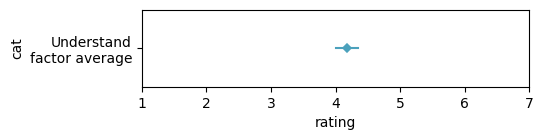

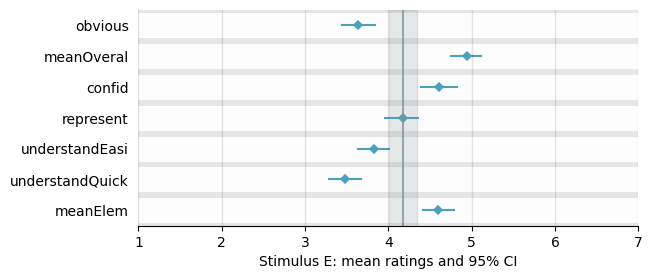

CI width= 0.3079067121729224
Line2D(_child0)
Found CI bar


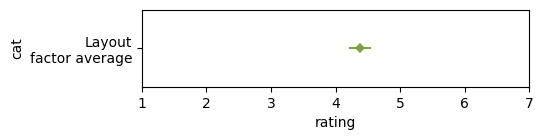

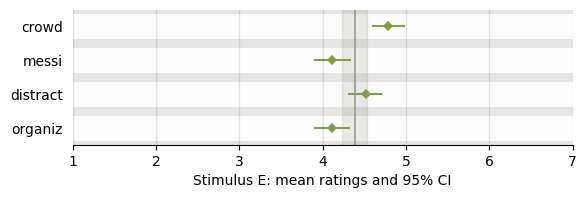

CI width= 0.3627200704225353
Line2D(_child0)
Found CI bar


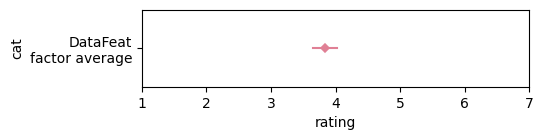

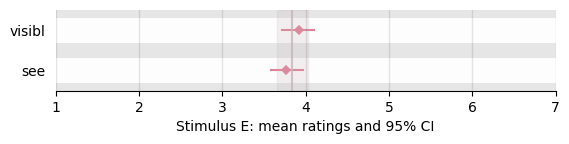

CI width= 0.2906783276450504
Line2D(_child0)
Found CI bar


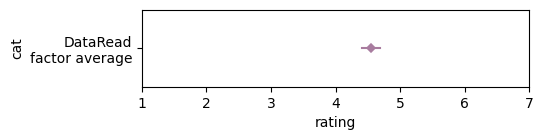

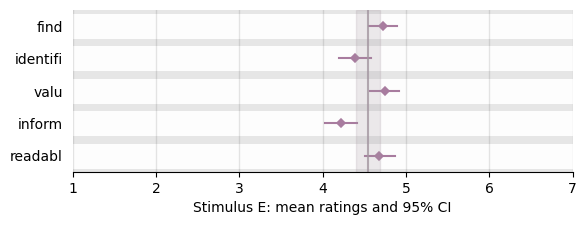

CI width= 0.2816166910450182
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


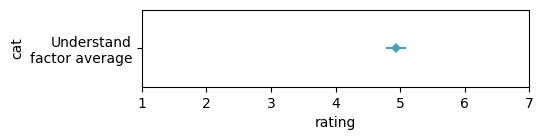

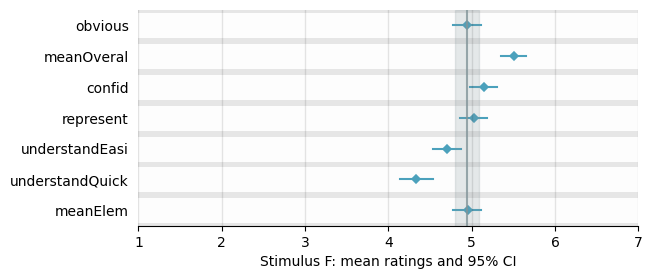

CI width= 0.2924701365187712
Line2D(_child0)
Found CI bar


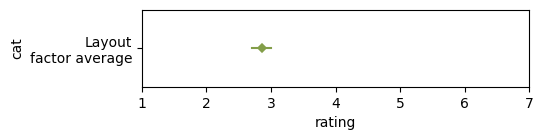

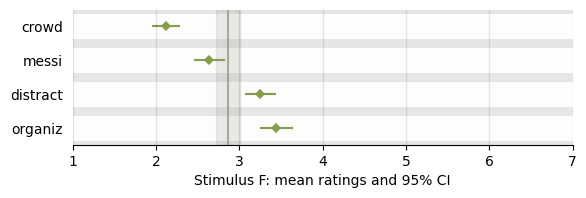

CI width= 0.3465017064846414
Line2D(_child0)
Found CI bar


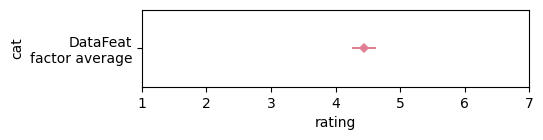

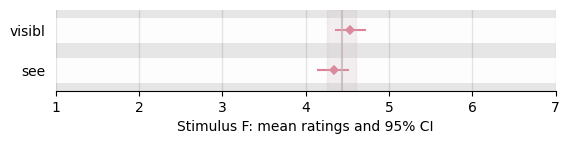

CI width= 0.2984300341296935
Line2D(_child0)
Found CI bar


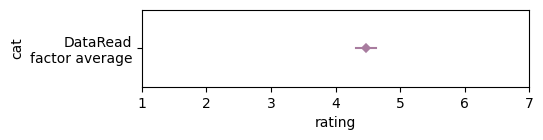

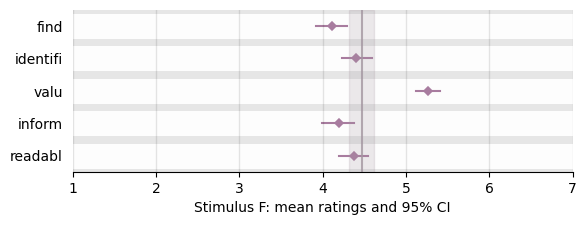

CI width= 0.15627893518518476
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


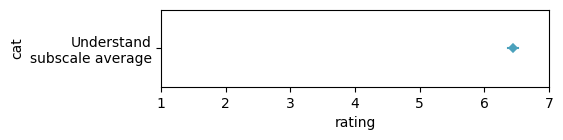

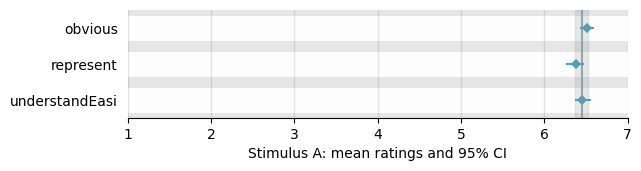

CI width= 0.2060474537037038
Line2D(_child0)
Found CI bar


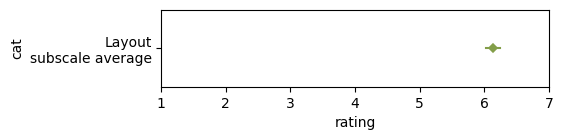

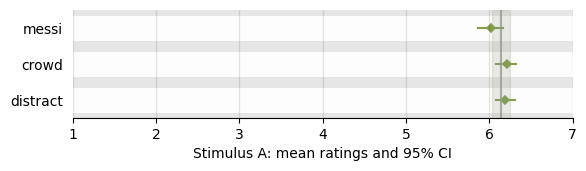

CI width= 0.30253496503496446
Line2D(_child0)
Found CI bar


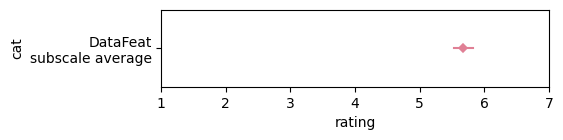

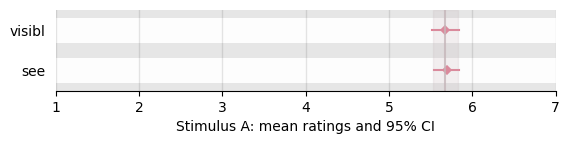

CI width= 0.19505208333333357
Line2D(_child0)
Found CI bar


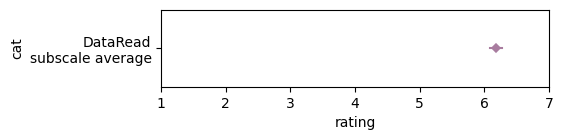

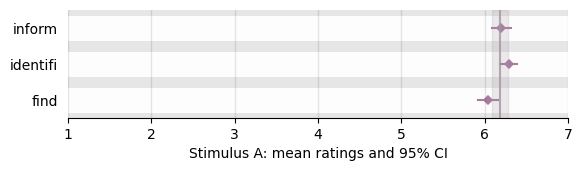

CI width= 0.14467592592592649
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


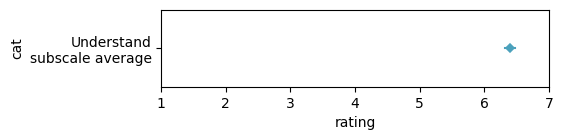

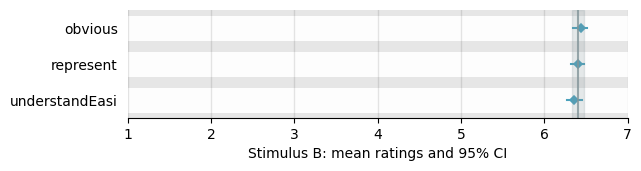

CI width= 0.30212673611111196
Line2D(_child0)
Found CI bar


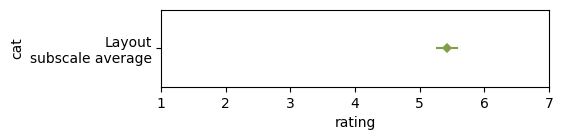

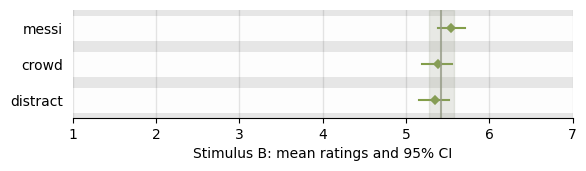

CI width= 0.23880662020905952
Line2D(_child0)
Found CI bar


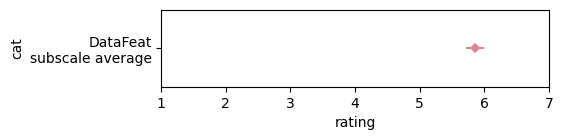

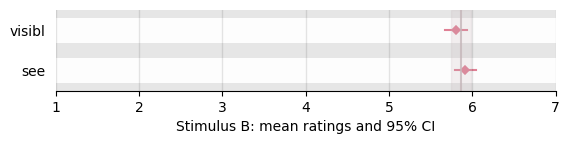

CI width= 0.17479745370370292
Line2D(_child0)
Found CI bar


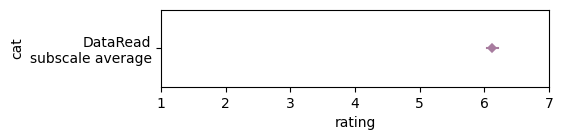

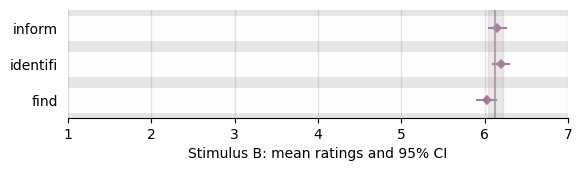

CI width= 0.1579849012775849
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


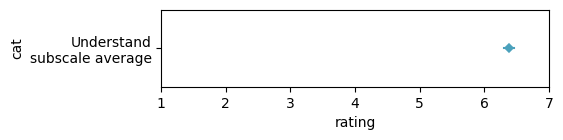

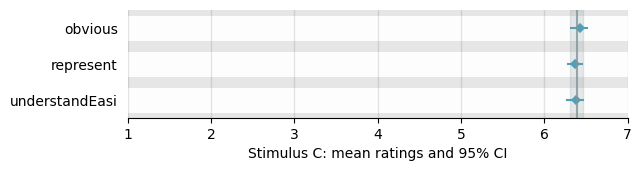

CI width= 0.2869337979094073
Line2D(_child0)
Found CI bar


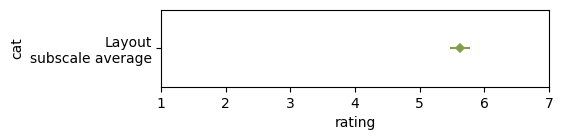

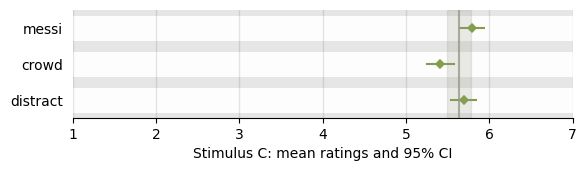

CI width= 0.31010452961672463
Line2D(_child0)
Found CI bar


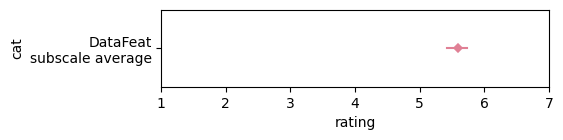

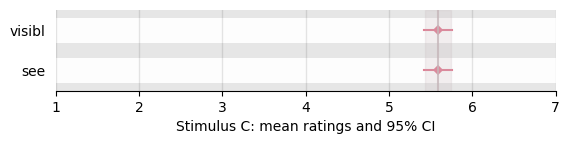

CI width= 0.1777003484320545
Line2D(_child0)
Found CI bar


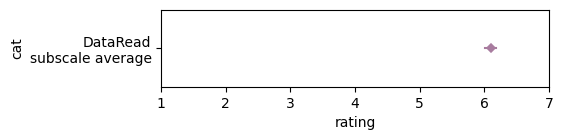

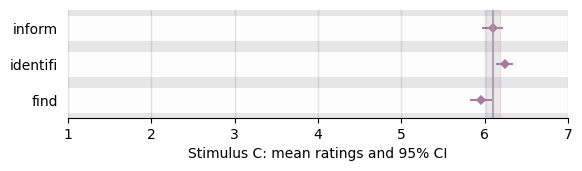

CI width= 0.3307578209277233
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


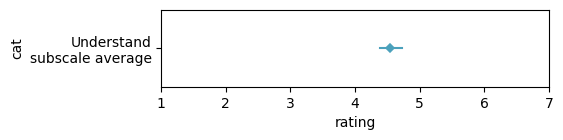

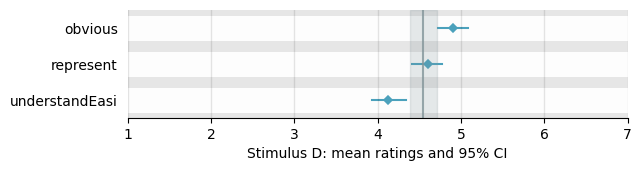

CI width= 0.2993797195253505
Line2D(_child0)
Found CI bar


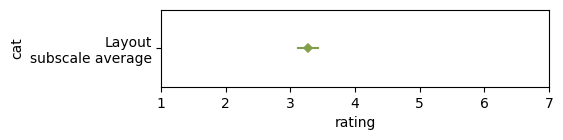

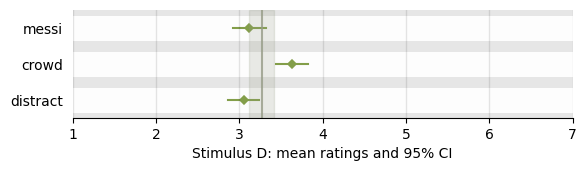

CI width= 0.36858766233766227
Line2D(_child0)
Found CI bar


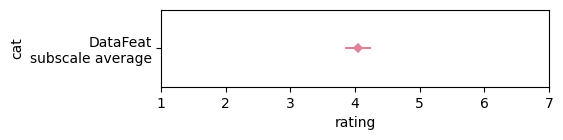

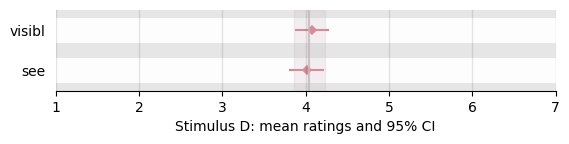

CI width= 0.3258360302049623
Line2D(_child0)
Found CI bar


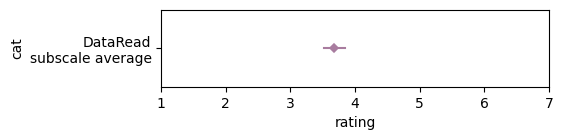

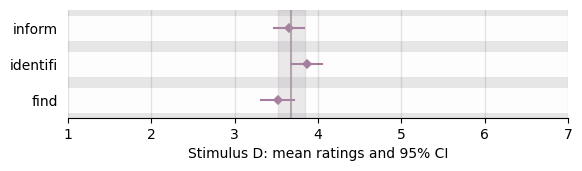

CI width= 0.38591609589041065
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


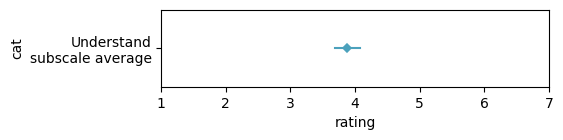

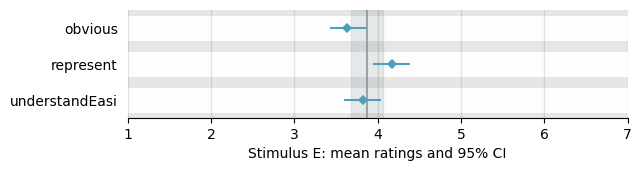

CI width= 0.3237201365187721
Line2D(_child0)
Found CI bar


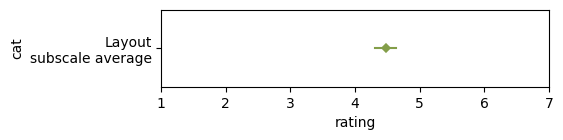

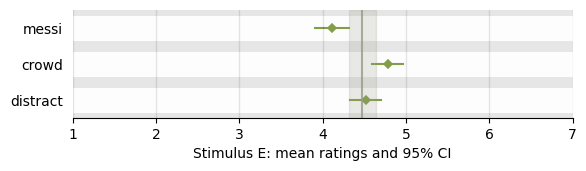

CI width= 0.38032570422535183
Line2D(_child0)
Found CI bar


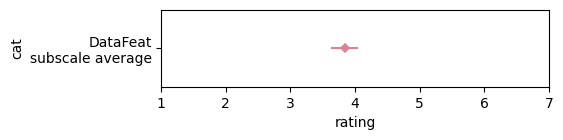

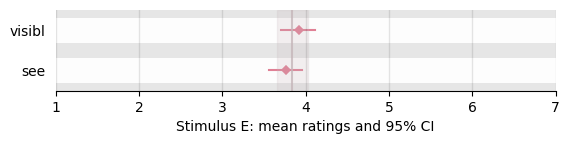

CI width= 0.335054038680318
Line2D(_child0)
Found CI bar


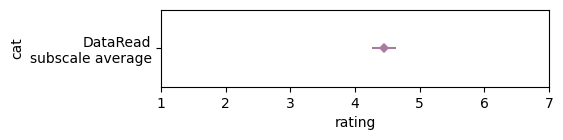

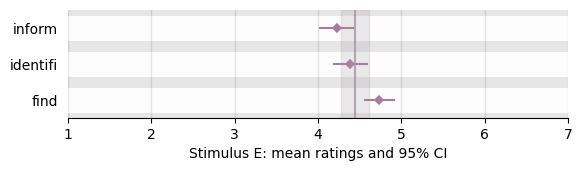

CI width= 0.29242036405005667
Line2D(_child0)
Found CI bar


/var/folders/ll/myjb0w6s7q95cmn7vm6lpghc0000gn/T/ipykernel_51143/2030114470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_c_df.drop(columns=['stimulus'], inplace=True)


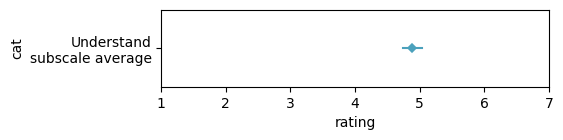

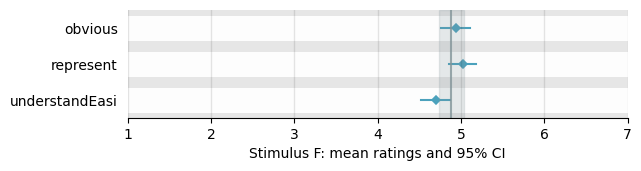

CI width= 0.3004835039817979
Line2D(_child0)
Found CI bar


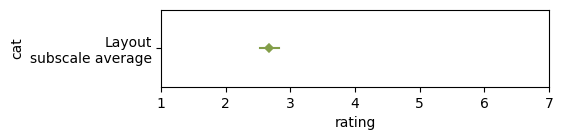

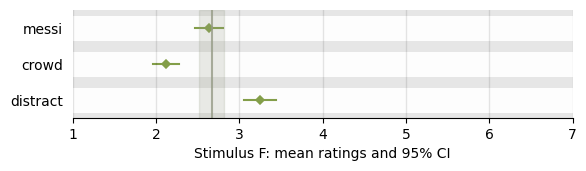

CI width= 0.35157849829351484
Line2D(_child0)
Found CI bar


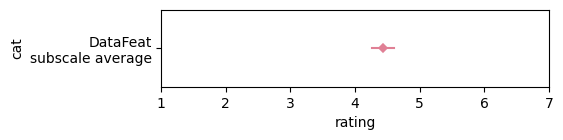

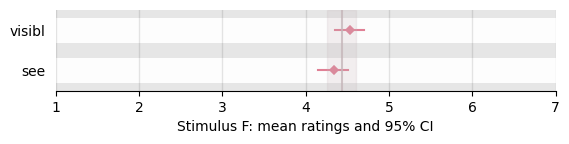

CI width= 0.3379977246871446
Line2D(_child0)
Found CI bar


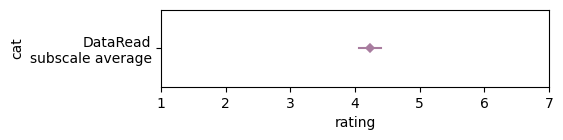

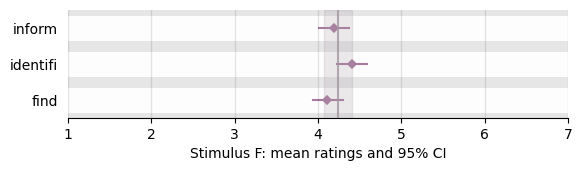

In [151]:
# per stimulus, all factor items
def make_plots_per_stimulusXfactor_across_items(d, condition_list, factor_dict, fileprefix='', colors_dict='hls'):
    
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'
    
    for c in condition_list:
        this_c_df = d[d['stimulus'] == c]
        this_c_df.drop(columns=['stimulus'], inplace=True)
        for f in factor_dict:
            this_f_average_cat_name = f'{f}\n{legend_average_name} average'

            this_c_f_df = this_c_df[factor_dict[f]]+4
            this_c_f_df[this_f_average_cat_name] = this_c_f_df.mean(axis=1)

            if isinstance(colors_dict, dict):
                sns.set_palette(colors_dict[f]) 
            elif isinstance(colors_dict, list):
                sns.set_palette(colors_dict)

            df_to_plot = pd.DataFrame()
            for col in this_c_f_df.columns:
                this_col_df = pd.DataFrame(this_c_f_df[col])
                this_col_df.rename(columns={col:'rating'}, inplace=True)
                this_col_df['cat'] = col
                df_to_plot = pd.concat([df_to_plot, this_col_df], axis=0, ignore_index=True)

            sns.set_palette(colors[f]) 

            fig2 = plt.figure(figsize=(5,1))

            ax2 = sns.pointplot(
                data=df_to_plot[df_to_plot['cat']==this_f_average_cat_name], x='rating', y="cat", 
                #hue='type', dodge=0.3,
                errorbar="ci", capsize=0,
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )
            ax2.set_xlim(left=1, right=7)
            # for line in ax2.lines:
            #     print(line.__dict__)

            #first line object is the point
            point_line = ax2.lines[0]
            x, y = point_line.get_xydata().T
            rating_point = x

            CI_line = ax2.lines[1]
            ci_coord = CI_line.__dict__['_xorig']
            ci_width = ci_coord[1]-ci_coord[0]
            print("CI width=", ci_width)


            for line in ax2.lines:
                  # Get the x and y coordinates of the line
                print(line)
                if isinstance(line, mpl.lines.Line2D) and '_xorig' in line.__dict__:
                    print('Found CI bar')
                    # Extract the error bar data
                    
                    rating_point = np.mean(x)  # Get the x value (rating point)
                    break

            plt.show(fig2)


            # get number of items to plot to calculate height of figure
            nb_items = len(df_to_plot['cat'].unique())
            # fig_height = nb_items/2+0.2
            # fig = plt.figure(figsize=(8,fig_height))
            fig = plt.figure()

            ax1 = sns.pointplot(
                data=df_to_plot[df_to_plot['cat']!=this_f_average_cat_name], x='rating', y="cat", 
                #hue='type', dodge=0.3,
                errorbar="ci", capsize=0,
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )

            #background grey color
            ax1.set_facecolor((0.9,0.9,0.9))

            #plot average and CI rectangle
            ax1.axvline(x=rating_point, color=colors[f][1], alpha = 0.8, zorder=2)
            # Calculate the left and right boundaries of the rectangle
            left = rating_point - ci_width / 2
            right = rating_point + ci_width / 2

            # Plot the rectangle
            ax1.add_patch(plt.Rectangle((left, -0.5), ci_width, len(df_to_plot['cat'].unique()), color=colors[f][1], alpha=0.2, zorder=2))

            # x axis parameters
            ax1.set_xlim(left=1, right=7)
            ax1.set_xlabel(f'Stimulus {c}: mean ratings and 95% CI')

            # Manually plot vertical lines following x-axis ticks
            for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
                ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

            # y axis parameters
            ax1.tick_params(axis='y', width=0) # remove ticks
            # ax1.grid(axis='y', linewidth=12+fig_height, color='white', alpha=0.95, zorder=0)
            ax1.grid(axis='y', linewidth=18, color='white', alpha=0.95, zorder=0)
            ax1.set_ylabel('')
            
            sns.despine(left=True, top=True, right=True) #removing the frame

            def set_size(w,h, ax=None): #https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
                """ w, h: width, height in inches """
                if not ax: ax=plt.gca()
                l = ax.figure.subplotpars.left
                r = ax.figure.subplotpars.right
                t = ax.figure.subplotpars.top
                b = ax.figure.subplotpars.bottom
                figw = float(w)/(r-l)
                figh = float(h)/(t-b)
                ax.figure.set_size_inches(figw, figh)

            set_size(5,nb_items/3.7)

            plt.show(fig)

            # plt.show(g)
            fig.savefig(f"{folder}/{c}-{fileprefix}_{f}.pdf", bbox_inches='tight')



make_plots_per_stimulusXfactor_across_items(df, conditions, full_factors, fileprefix='Full_factors_ratings', colors_dict=colors)
make_plots_per_stimulusXfactor_across_items(df, conditions, final_scale, fileprefix='PREVis_items_ratings', colors_dict=colors)

In [152]:
# fig, ax1 = plt.subplots(1,1)

#             ax2 = ax1.twinx()
#             ax2.sharex(ax1)

#             # ax2 = ax1.secondary_xaxis('top')

#             sns.pointplot(
#                 data=plot_i_df,
#                 ax = ax1,
#                 x='rating',
#                 y="stimulus",
#                 hue='type', dodge=0.3,
#                 errorbar="ci", capsize=0,
#                 #palette="Accent_r", #color=".5",
#                 linestyle="none", linewidth=1.5,
#                 marker="D", markersize=4,
#             )
#             ax1.set_xlim(left=1, right=7)
#             ax1.tick_params(axis='y', width=0)
#             ax1.grid(axis='y', linewidth=40, color='white', alpha=0.95, zorder=0)
#             ax1.grid(axis='x', linewidth=1, color=((0.5,0.5,0.5)), zorder=1)
#             ax1.legend(title='')

#             ax1.set_facecolor((0.9,0.9,0.9))
#             sns.move_legend(ax1, "lower right", bbox_to_anchor=(1, 1))
#             sns.despine(left=True, top=True, right=True) #removing the frame
            
#             # ax2.grid(axis='x', linewidth=1, which='major', color=((0.5,0.5,0.5)), zorder=1)

#             ticksoff = dict(labelleft=False, labelright=False, left=False, right=False)
#             ax2.tick_params(axis="y", **ticksoff)
#             ax2.grid(axis='y', visible=False)

#             plt.show(fig)
#             fig.savefig(f"{plots_outdir}/{fileprefix}-{f}_{i}.pdf", bbox_inches='tight')


## Plot each item across stimuli

obvious


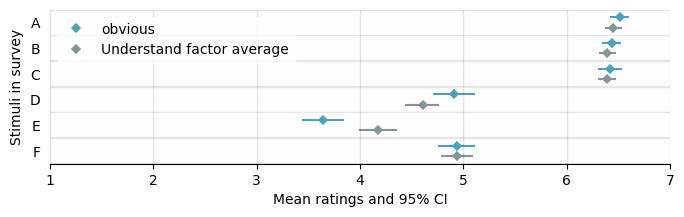

meanOveral


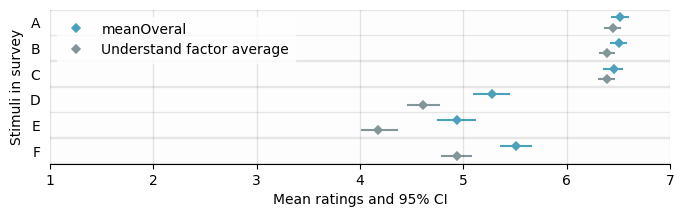

confid


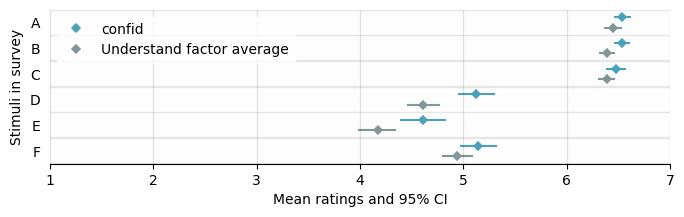

represent


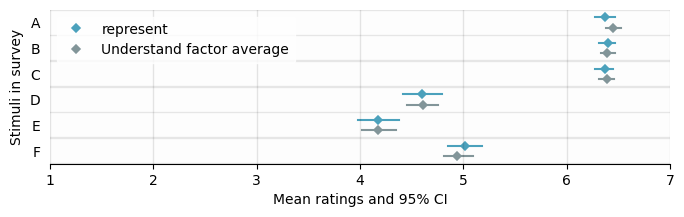

understandEasi


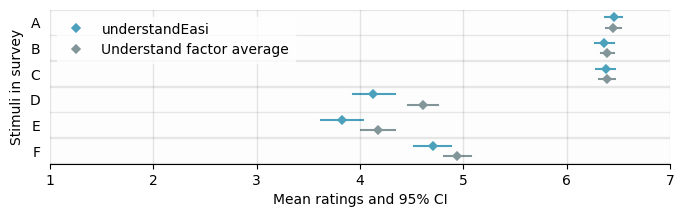

understandQuick


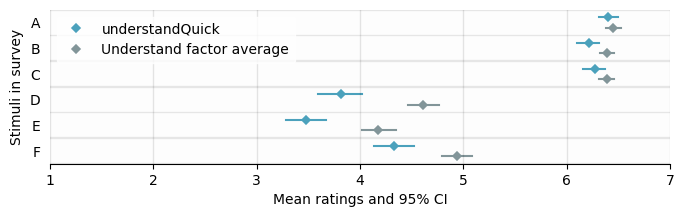

meanElem


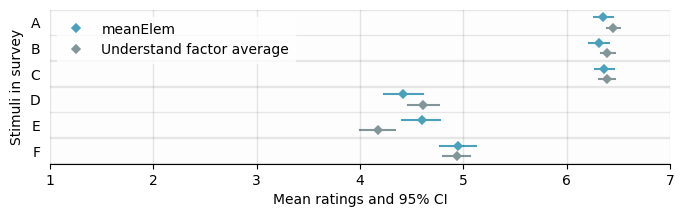

crowd


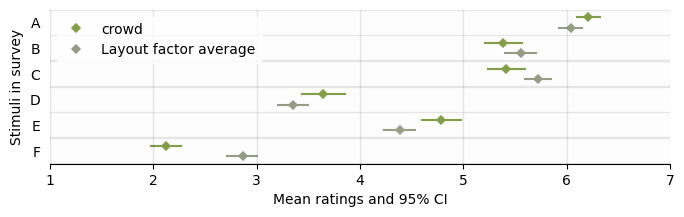

messi


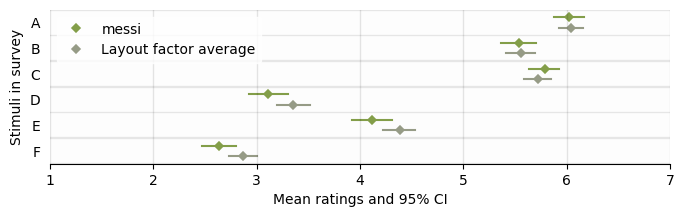

distract


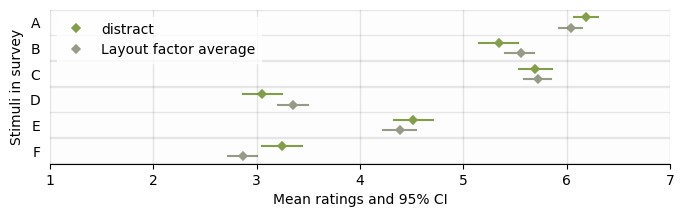

organiz


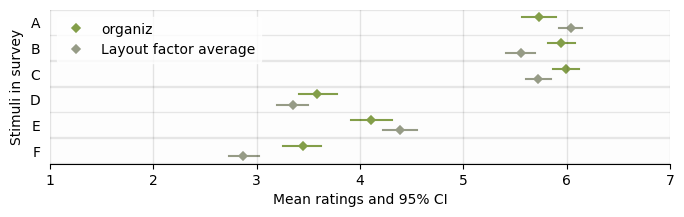

visibl


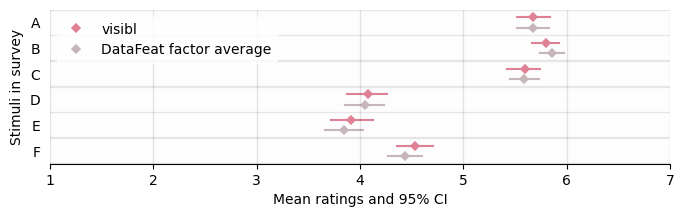

see


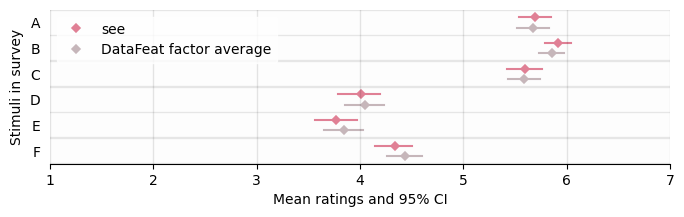

find


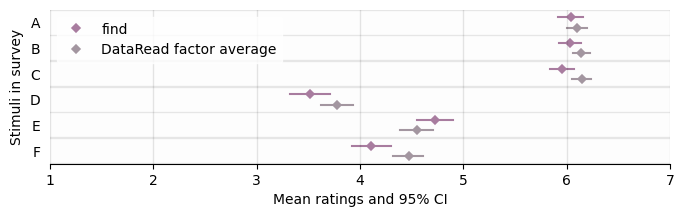

identifi


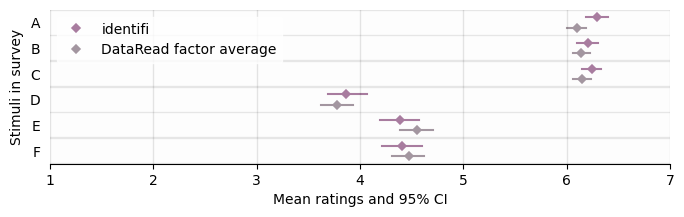

valu


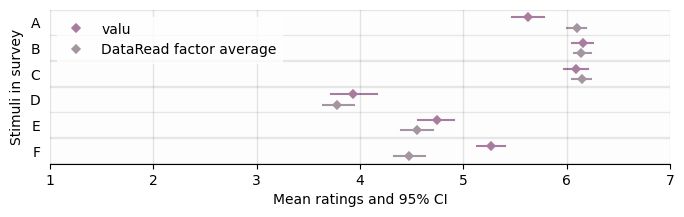

inform


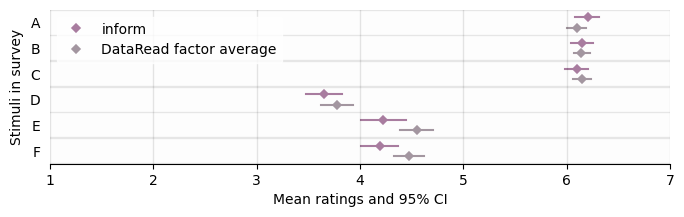

readabl


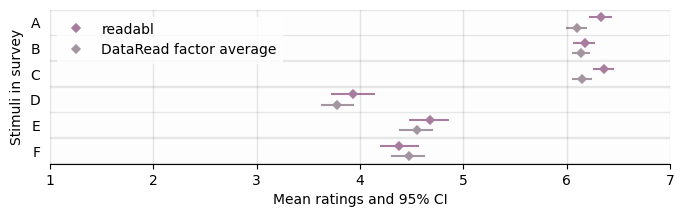

obvious


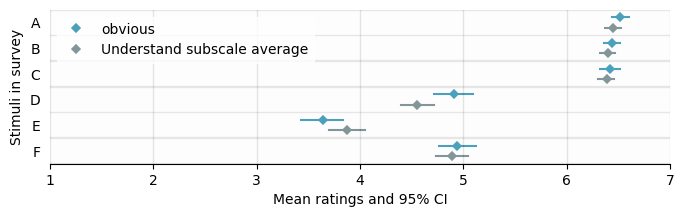

represent


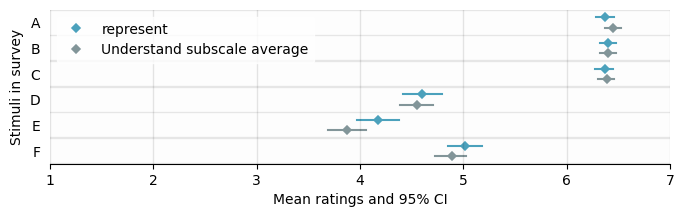

understandEasi


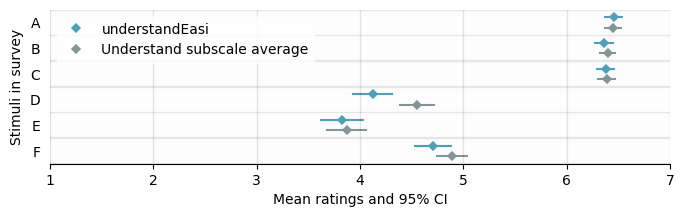

messi


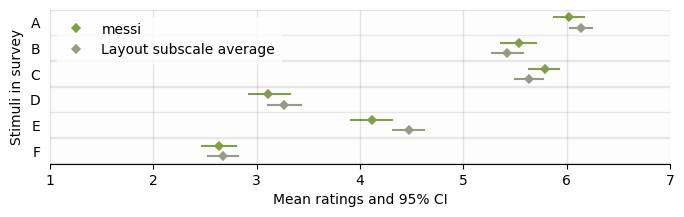

crowd


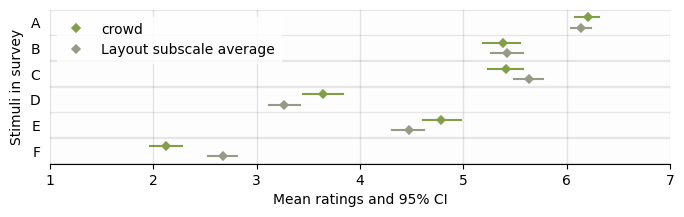

distract


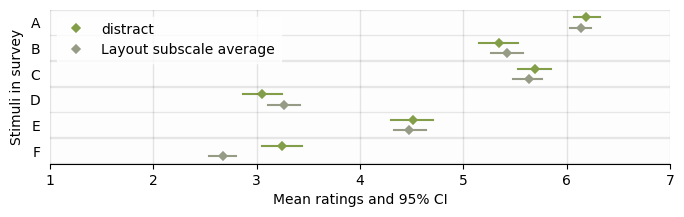

visibl


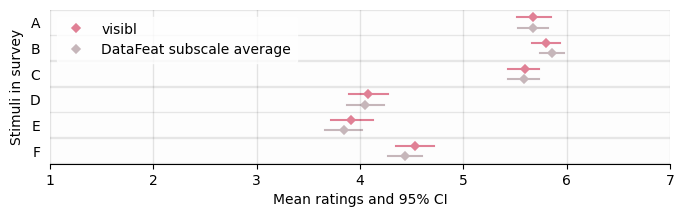

see


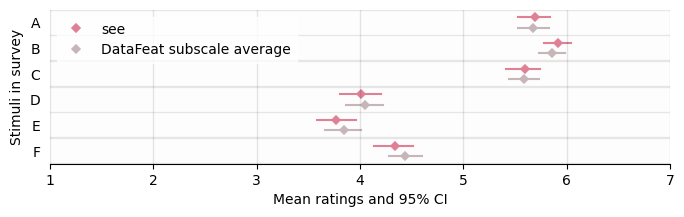

inform


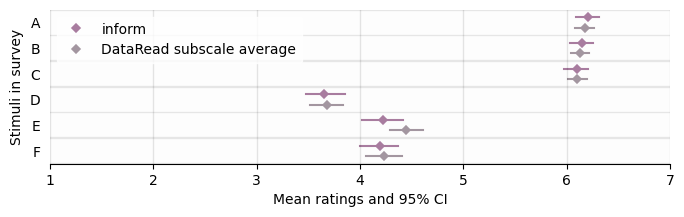

identifi


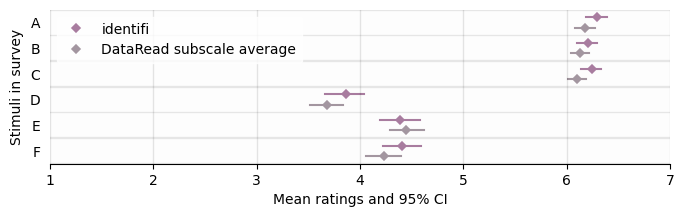

find


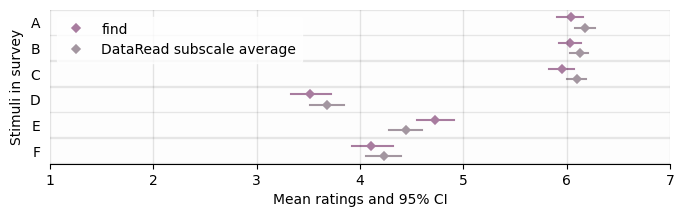

In [153]:
#plot each item across multiple stimuli

def make_plots_per_itemXfactor_across_stimuli(d, factor_dict, fileprefix):
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'

    for f in factor_dict:
        this_f_df = d[['stimulus']+factor_dict[f]]
        this_f_average = pd.DataFrame(this_f_df['stimulus'])
        this_f_average['rating'] = this_f_df[factor_dict[f]].mean(axis=1)+4
        this_f_average['type'] = f'{f} {legend_average_name} average'
        sns.set_palette(colors[f]) 
        for i in factor_dict[f]:
            print(i)
            this_i_df = pd.DataFrame(this_f_df['stimulus'])
            this_i_df['rating'] = this_f_df[[i]]+4
            this_i_df['type'] = i
            plot_i_df = pd.concat([this_i_df,this_f_average], axis=0, ignore_index=True)
            
            # fig, ax1 = plt.subplots()
            fig = plt.figure(figsize=(8,2))

            # sns.pointplot(
            #     ax = ax1,
            ax1 = sns.pointplot(
                data=plot_i_df,
                x='rating',
                y="stimulus",
                hue='type', dodge=0.4,
                errorbar="ci", capsize=0,
                #palette="Accent_r", #color=".5",
                linestyle="none", linewidth=1.5,
                marker="D", markersize=4,
            )
            
            #background grey color
            ax1.set_facecolor((0.9,0.9,0.9))

            # x axis parameters
            ax1.set_xlim(left=1, right=7)
            ax1.set_xlabel('Mean ratings and 95% CI')

            # Manually plot vertical lines following x-axis ticks
            for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
                ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

            # y axis parameters
            ax1.tick_params(axis='y', width=0) # remove ticks
            ax1.grid(axis='y', linewidth=17, color='white', alpha=0.95, zorder=0)
            ax1.set_ylabel('Stimuli in survey')
            
            ax1.legend(title='', loc='upper left', edgecolor='white')

            # sns.move_legend(ax1, "lower right", bbox_to_anchor=(1, 1))
            sns.despine(left=True, top=True, right=True) #removing the frame

            plt.show(fig)
            fig.savefig(f"{folder}/{fileprefix}-{f}_{i}.pdf", bbox_inches='tight')

make_plots_per_itemXfactor_across_stimuli(df, full_factors, 'Full_factors_ratings')
make_plots_per_itemXfactor_across_stimuli(df, final_scale, 'PREVis_items_ratings')


# to check https://stackoverflow.com/questions/55615701/how-to-put-grid-lines-from-the-secondary-axis-behind-the-primary-plot

# Plot averages only

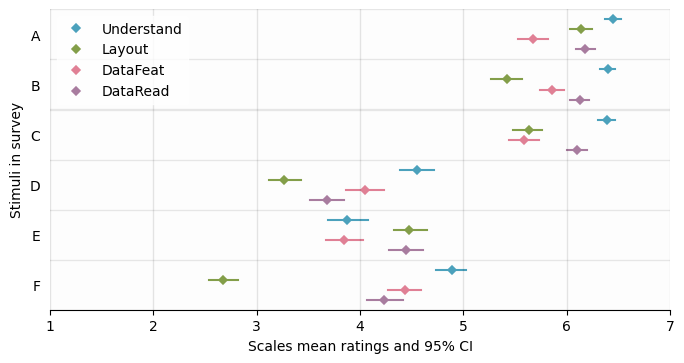

In [154]:
#plot each item across multiple stimuli

def make_plots_per_scale_across_stimuli(d, factor_dict, fileprefix):
    if 'PREVis' in fileprefix:
        legend_average_name = 'subscale'
        folder = f'{plots_outdir}-PREVis'
    elif 'factors' in fileprefix:
        legend_average_name = 'factor'
        folder = f'{plots_outdir}-factors'

    scales_colors = []

    df_to_plot = pd.DataFrame()

    for f in factor_dict:
        this_f_cols = factor_dict[f]
        this_f_d = pd.DataFrame(df[this_f_cols].mean(axis=1)+4, columns=['ratings'])
        this_f_d['subscale'] = f
        this_f_d['stimulus'] = d['stimulus']

        df_to_plot = pd.concat([df_to_plot, this_f_d], axis=0, ignore_index=True)

        scales_colors += [colors[f][0]]

        
    sns.set_palette(scales_colors)     
    fig = plt.figure(figsize=(8,3.9))

    # sns.pointplot(
    #     ax = ax1,
    ax1 = sns.pointplot(
        data=df_to_plot,
        x='ratings',
        y="stimulus",
        hue='subscale', dodge=0.6,
        errorbar="ci", capsize=0,
        linestyle="none", linewidth=1.5,
        marker="D", markersize=4,
    )
    
    #background grey color
    ax1.set_facecolor((0.9,0.9,0.9))

    # x axis parameters
    ax1.set_xlim(left=1, right=7)
    ax1.set_xlabel('Scales mean ratings and 95% CI')

    # Manually plot vertical lines following x-axis ticks
    for x_tick in ax1.get_xticks()[0:]: #ignoring the first tick
        ax1.axvline(x_tick, color=((0,0,0,0.1)), linewidth=1, zorder=5)

    # y axis parameters
    ax1.tick_params(axis='y', width=0) # remove ticks
    ax1.grid(axis='y', linewidth=35, color='white', alpha=0.95, zorder=0)
    ax1.set_ylabel('Stimuli in survey')
    
    ax1.legend(title='', loc='upper left', edgecolor='white')

    # sns.move_legend(ax1, "lower right", bbox_to_anchor=(1, 1))
    sns.despine(left=True, top=True, right=True) #removing the frame

    plt.show(fig)
    fig.savefig(f"{folder}/{fileprefix}.pdf", bbox_inches='tight')

# make_plots_per_itemXfactor_across_stimuli(df, full_factors, 'Full_factors_ratings')
make_plots_per_scale_across_stimuli(df, final_scale, 'PREVis_subscales_ratings')


# to check https://stackoverflow.com/questions/55615701/how-to-put-grid-lines-from-the-secondary-axis-behind-the-primary-plot

In [155]:
print(sns.__version__)

0.13.2
